In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(114514)

# 2.4

In [25]:
points = [0, 1, 2, 3, 5, 5, 7, 8, 9, 10]

In [26]:
mean = np.mean(points)
std = np.std(points)

In [27]:
mean, std

(5.0, 3.286335345030997)

In [28]:
std_points = [(point - mean) / std for point in points]

標準得点

In [29]:
std_points

[-1.5214515486254614,
 -1.217161238900369,
 -0.9128709291752768,
 -0.6085806194501845,
 0.0,
 0.0,
 0.6085806194501845,
 0.9128709291752768,
 1.217161238900369,
 1.5214515486254614]

へんさち

In [31]:
hensachi  =  [10 * point + 50 for point in std_points]

In [33]:
hensachi

[34.78548451374539,
 37.82838761099631,
 40.87129070824723,
 43.91419380549816,
 50.0,
 50.0,
 56.08580619450184,
 59.12870929175277,
 62.17161238900369,
 65.21451548625461]

# 3.1

データは教科書のまえがきの最後のリンクからがんばって探すと見つかります

In [11]:
senkyo = pd.read_csv('./1-0d-1.csv', encoding='shift-jis')

In [12]:
senkyo.head()

,都道府県,自民得票率,持家比率
0,北海道,41.4,52.8
1,青 森,76.3,71.2
2,岩 手,59.2,72.6
3,宮 城,51.8,63.7
4,秋 田,52.5,81.3


散布図

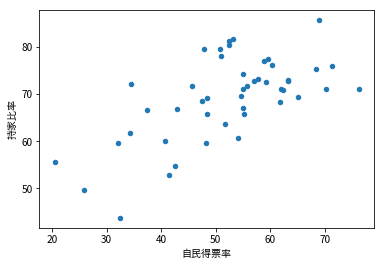

In [16]:
senkyo.plot.scatter('自民得票率', '持家比率')

相関係数

In [17]:
senkyo.corr()

,自民得票率,持家比率
自民得票率,1.000000,0.638724
持家比率,0.638724,1.000000


電卓でやるなら、相関係数 = 共分散 ÷ (分散1×分散2) とすればよい。

教科書的にはとても弱い相関？散布図見た感じは相関はありそう

# 3.4

## i)

np.random.randintで楽をします。

(array([90409., 90334., 90417., 90458., 90968., 91163., 91183., 90845.,
        91567., 91191., 91465.]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        ]),
 <a list of 11 Patch objects>)

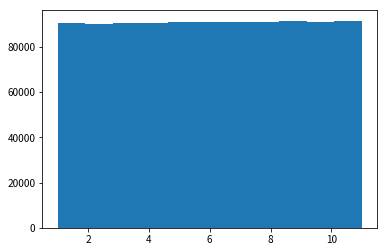

In [3]:
plt.hist(np.random.randint(1, high=12, size=1000000), bins=11)

## ii)

indexは0から始まるので、乱数は0以上10以下でやります。

In [4]:
talls = pd.DataFrame({
    'male': [71, 68, 66, 67, 70, 71, 70, 73, 72, 65, 66],
    'female': [69, 64, 65, 63, 65, 62, 65, 64, 66, 59, 62]})
talls

,male,female
0,71,69
1,68,64
2,66,65
3,67,63
4,70,65
5,71,62
6,70,65
7,73,64
8,72,66
9,65,59


In [5]:
def boostrap(talls, n_iter):
    result = []
    for _ in range(n_iter):
        data = pd.DataFrame()
        for _ in range(11):
            idx = np.random.randint(0, high=11)
            data = data.append(talls[idx: idx + 1])
        result += [data.corr().values[0, 1]]
    return result

arrayとかでやったほうがたぶん計算は速いです

In [6]:
boostrap(talls, 1)

[0.35481884404496294]

次にヒストグラムにするとおり、1回だけやったときの値はかなりブレます。

## iii)

200回

(array([ 7.,  6., 11., 24., 25., 31., 40., 32., 15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 9 Patch objects>)

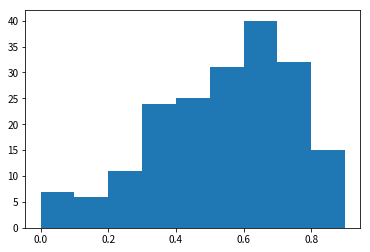

In [8]:
plt.hist(boostrap(talls, 200), bins=np.arange(0, 1, 0.1))

1000回

(array([  9.,  14.,  11.,  20.,  34.,  29.,  35.,  49.,  68.,  81.,  95.,
         87.,  86., 100.,  88.,  68.,  46.,  28.,  17.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <a list of 19 Patch objects>)

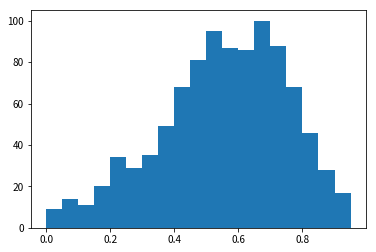

In [9]:
plt.hist(boostrap(talls, 1000), bins=np.arange(0, 1, 0.05))

ブーストラップでできた分布がどういう分布になるみたいな法則とかあるんですかね？